In [52]:
import numpy as np
import pandas as pd
import joblib
from sklearn.metrics import log_loss, plot_confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
#from data_preprocess import oversampling_dataset
import matplotlib.pyplot as plt

In [53]:
def loadData(path):
    df= pd.read_csv(path)
    return pd.DataFrame(df)

In [54]:
def train_decisionTree_model():
    # read the data
    df_train_x = loadData('X_train.csv')
    y_train = np.ravel(loadData('Y_train.csv'))
    df_test = loadData('X_test.csv')
    
    # fit the data into the model
    decisionTree = DecisionTreeClassifier(max_depth=5, class_weight='balanced', criterion='entropy')
    decisionTree.fit(df_train_x, y_train)
    
    submission = loadData('sample_submission.csv')
    target = decisionTree.predict_proba(df_test)
    submission['TARGET'] = target[:,1]
    submission.to_csv('submission_decisionTree.csv', index=False)
    
    # save the model
    joblib.dump(decisionTree, 'model_decisionTree.joblib')
    return

In [55]:
def find_best_depth():
    # read the data
    df_train_x = loadData('X_train.csv')
    y_train = np.ravel(loadData('Y_train.csv'))
    df_test = loadData('X_test.csv')
    
    score_list=[]
    
    df_train_x = df_train_x.to_numpy()
    
    # fit the data into the model
    depth_grid = range(1, 50)
    kfold = KFold(n_splits=5)
    for i in depth_grid:
        roc_score = 0
        for train, test in kfold.split(df_train_x, y_train):
            decisionTree = DecisionTreeClassifier(max_depth=i)
            decisionTree.fit(df_train_x[train], y_train[train])
            
            prediction = decisionTree.predict_proba(df_train_x[test])[:,1]
            roc_score += roc_auc_score(y_train[test], prediction)
        print("accuracy: ", roc_score/5, "  depth: ", i)
        score_list.append(roc_score/5)
        
    plt.figure(figsize=(12, 6))
    plt.plot(depth_grid, score_list, color='red', linestyle='dashed', marker='o',
            markerfacecolor='blue', markersize=10)
    plt.title("ROC score 5-fold CV with 'gini'")
    plt.xlabel('depth')
    plt.ylabel('ROC score')
    plt.savefig('images/tree_gini.png', bbox_inches='tight')
    
    score_list = []
    for i in depth_grid:
        roc_score = 0
        for train, test in kfold.split(df_train_x, y_train):
            decisionTree = DecisionTreeClassifier(max_depth=i, criterion='entropy')
            decisionTree.fit(df_train_x[train], y_train[train])
            
            prediction = decisionTree.predict_proba(df_train_x[test])[:,1]
            roc_score += roc_auc_score(y_train[test], prediction)
        print("accuracy: ", roc_score/5, "  depth: ", i)
        score_list.append(roc_score/5)
    
    plt.figure(figsize=(12, 6))
    plt.plot(depth_grid, score_list, color='red', linestyle='dashed', marker='o',
            markerfacecolor='blue', markersize=10)
    plt.title("ROC score 5-fold CV with 'entropy'")
    plt.xlabel('depth')
    plt.ylabel('ROC score')
    # plt.show()
    plt.savefig('images/tree_entropy.png', bbox_inches='tight')
    return



In [56]:
def depth_tuning(X_validation, Y_validation):
    X_validation = X_validation.to_numpy()
    
    score_list=[]
    # fit the data into the model
    depth_grid = range(1, 50)
    kfold = KFold(n_splits=5)
    for i in depth_grid:
        roc_score = 0
        for train, test in kfold.split(X_validation, Y_validation):
            decisionTree = DecisionTreeClassifier(max_depth=i, class_weight='balanced')
            decisionTree.fit(X_validation[train], Y_validation[train])
            
            prediction = decisionTree.predict_proba(X_validation[test])[:,1]
            roc_score += roc_auc_score(Y_validation[test], prediction)
        print("accuracy: ", roc_score/5, "  depth: ", i)
        score_list.append(roc_score/5)
    
    plt.figure(figsize=(12, 6))
    plt.plot(depth_grid, score_list, color='red', linestyle='dashed', marker='o',
            markerfacecolor='blue', markersize=10)
    plt.title("ROC score 5-fold CV with 'gini' balanced")
    plt.xlabel('depth')
    plt.ylabel('ROC score')
    plt.savefig('images/tree_gini_balanced.png', bbox_inches='tight')
    
    score_list = []
    for i in depth_grid:
        roc_score = 0
        for train, test in kfold.split(X_validation, Y_validation):
            decisionTree = DecisionTreeClassifier(max_depth=i, criterion='entropy', class_weight='balanced')
            decisionTree.fit(X_validation[train], Y_validation[train])
            
            prediction = decisionTree.predict_proba(X_validation[test])[:,1]
            roc_score += roc_auc_score(Y_validation[test], prediction)
        print("accuracy: ", roc_score/5, "  depth: ", i)
        score_list.append(roc_score/5)
    
    plt.figure(figsize=(12, 6))
    plt.plot(depth_grid, score_list, color='red', linestyle='dashed', marker='o',
            markerfacecolor='blue', markersize=10)
    plt.title("ROC score 5-fold CV with 'entropy' balanced")
    plt.xlabel('depth')
    plt.ylabel('ROC score')
    plt.savefig('images/tree_entropy_balanced.png', bbox_inches='tight')
    return


 

accuracy:  0.6801861499008128   depth:  1
accuracy:  0.771311863868142   depth:  2
accuracy:  0.7975988347927578   depth:  3
accuracy:  0.8039526752430431   depth:  4
accuracy:  0.8107744590902961   depth:  5
accuracy:  0.8123832034108431   depth:  6
accuracy:  0.8131407798497363   depth:  7
accuracy:  0.8115560697741231   depth:  8
accuracy:  0.8051433804808177   depth:  9
accuracy:  0.8013288860658513   depth:  10
accuracy:  0.7848458982220465   depth:  11
accuracy:  0.7667071719855405   depth:  12
accuracy:  0.73313947241513   depth:  13
accuracy:  0.711390802847769   depth:  14
accuracy:  0.6910126653015886   depth:  15
accuracy:  0.679463376115222   depth:  16
accuracy:  0.6536033605286026   depth:  17
accuracy:  0.6456279054261619   depth:  18
accuracy:  0.6373126956494735   depth:  19
accuracy:  0.6565533998557722   depth:  20
accuracy:  0.6330798632918107   depth:  21
accuracy:  0.6468084442804707   depth:  22
accuracy:  0.6321767960455784   depth:  23
accuracy:  0.627676830586

FileNotFoundError: [Errno 2] No such file or directory: 'images/tree_gini.png'

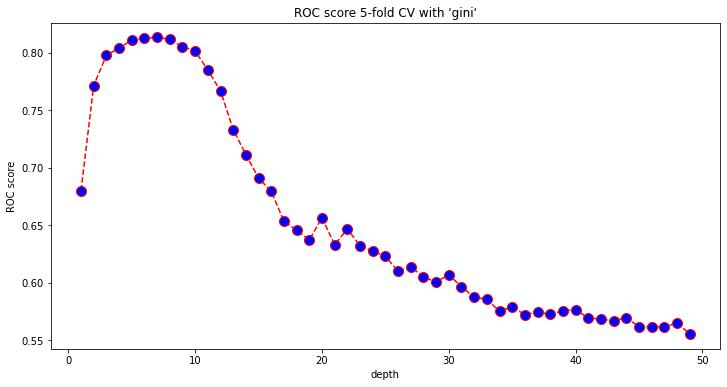

In [57]:
find_best_depth()